# Project 1

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [7]:
training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

Using downloaded and verified file: data\FashionMNIST\raw\train-images-idx3-ubyte.gz
Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw

Using downloaded and verified file: data\FashionMNIST\raw\train-labels-idx1-ubyte.gz
Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw

Using downloaded and verified file: data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz
Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



C:\Users\jatin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)
for x, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {x.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(nn.Linear(28 * 28, 512), 
                                              nn.ReLU(), 
                                              nn.Linear(512, 512), 
                                              nn.ReLU(), 
                                              nn.Linear(512, 10))
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [13]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(x)
            print(f"loss: {loss:>7f} [{current:>5d} / {size:>5d}]")

In [14]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):0.1f}%, Avg loss: {test_loss:>8f}\n")

In [15]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t + 1} \n--------------------------------------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
    print("Done!")

Epoch 1 
--------------------------------------------------------------
loss: 2.298594 [    0 / 60000]
loss: 2.284503 [ 6400 / 60000]
loss: 2.265263 [12800 / 60000]
loss: 2.257590 [19200 / 60000]
loss: 2.236942 [25600 / 60000]
loss: 2.224717 [32000 / 60000]
loss: 2.214906 [38400 / 60000]
loss: 2.192104 [44800 / 60000]
loss: 2.185127 [51200 / 60000]
loss: 2.150448 [57600 / 60000]
Test Error: 
 Accuracy: 59.3%, Avg loss: 2.145071

Done!
Epoch 2 
--------------------------------------------------------------
loss: 2.153534 [    0 / 60000]
loss: 2.139211 [ 6400 / 60000]
loss: 2.079506 [12800 / 60000]
loss: 2.093834 [19200 / 60000]
loss: 2.032869 [25600 / 60000]
loss: 1.990065 [32000 / 60000]
loss: 2.001478 [38400 / 60000]
loss: 1.926947 [44800 / 60000]
loss: 1.927960 [51200 / 60000]
loss: 1.846336 [57600 / 60000]
Test Error: 
 Accuracy: 60.3%, Avg loss: 1.850356

Done!
Epoch 3 
--------------------------------------------------------------
loss: 1.880931 [    0 / 60000]
loss: 1.850827 [ 64

In [16]:
torch.save(model.state_dict(), "model.pth")
print("Saved Pytorch Model State to model.pth")

Saved Pytorch Model State to model.pth


In [19]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [20]:
classes = [
    "T-shirt/top",
    "Trouser",
    "pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f"Predicted: {predicted}, Actual: {actual}")

Predicted: Ankle boot, Actual: Ankle boot


# Datasets and Dataloaders 

In [21]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [22]:
training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

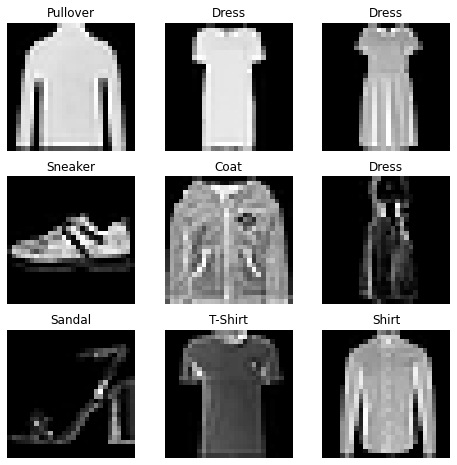

In [23]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [24]:
import os
import pandas as pd
from torchvision.io import read_image

In [25]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    def __len__(self):
        return len(self.img_labels)
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.tranform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [26]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


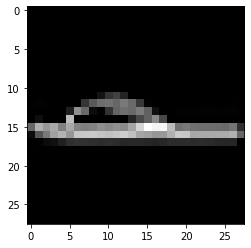

Label: 5


In [27]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Transforms

In [28]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [29]:
ds = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor, 
                           target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, 
                            torch.tensor(y), value=1)))

In [30]:
target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), 
                                                                                value=1))

# Automatic Differentiation with torch.autograd

In [32]:
import torch
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [33]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x000002458845C6D0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward object at 0x000002458843A3A0>


In [34]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1279, 0.0225, 0.3276],
        [0.1279, 0.0225, 0.3276],
        [0.1279, 0.0225, 0.3276],
        [0.1279, 0.0225, 0.3276],
        [0.1279, 0.0225, 0.3276]])
tensor([0.1279, 0.0225, 0.3276])


In [35]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

True
False


In [36]:
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


In [37]:
inp = torch.eye(5, requires_grad=True)
out = (inp + 1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(inp), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


# Models save and load

In [38]:
import torch
import torchvision.models as models

In [40]:
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), "model_weights.pth")

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\jatin/.cache\torch\hub\checkpoints\vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [42]:
model = models.vgg16()
model.load_state_dict(torch.load("model_weights.pth"))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [43]:
torch.save(model, "model.pth")

In [44]:
model = torch.load('model.pth')

# Learn torch basics

In [46]:
import numpy as np
import math

x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
print(f"Result: y={a} + {b}x + {c}x^2 + {d} x^3")

99 3629.041681325417
199 2449.30003303458
299 1655.5699007690318
399 1121.0732553530781
499 760.81373494596
599 517.7633742877505
699 353.6292399284553
799 242.67743257605954
899 167.59936504466538
999 116.7430666146207
1099 82.25742277582951
1199 58.84739056496646
1299 42.93838530235322
1399 32.114886083331406
1499 24.74295430088108
1599 19.716194564724212
1699 16.28463684208963
1799 13.93936662217947
1899 12.334666930370215
1999 11.235423944201811
Result: y=0.03971365226797444 + 0.8258387485652217x + -0.006851265854251785x^2 + -0.08893483519456231 x^3


In [47]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    a -= leanring_rate * grad_a
    b -= leanring_rate * grad_b
    c -= leanring_rate * grad_c
    d -= learning_rate * grad_d

print(f"Result: y = {a.item()} + {b.item()}x + {c.item()}x^2 + {d.item()}x^3")

99 3294.3759765625
199 2303.0654296875
299 1611.9930419921875
399 1129.84912109375
499 793.2181396484375
599 558.015380859375
699 393.56744384765625
799 278.513671875
899 197.96717834472656
999 141.54449462890625
1099 101.99798583984375
1199 74.26490020751953
1299 54.80618667602539
1399 41.14626693725586
1499 31.552724838256836
1599 24.81198501586914
1699 20.073762893676758
1799 16.741790771484375
1899 14.397868156433105
1999 12.748387336730957
Result: y = -0.06416663527488708 + 0.8411777019500732x + 0.011069810017943382x^2 + -0.09111665934324265x^3


In [49]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

leanring_rate = 1e-6
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
print(f"Result: y = {a.item()} + {b.item()}x + {c.item()}x^2 + {d.item()}x^3")

99 142.61871337890625
199 100.33058166503906
299 71.48236083984375
399 51.77716064453125
499 38.302059173583984
599 29.076679229736328
699 22.753379821777344
799 18.414396286010742
899 15.433587074279785
999 13.383522033691406
1099 11.971993446350098
1199 10.99907112121582
1299 10.32772159576416
1399 9.86398696899414
1499 9.543313026428223
1599 9.321340560913086
1699 9.167546272277832
1799 9.060883522033691
1899 8.986836433410645
1999 8.935384750366211
Result: y = 0.010143890976905823 + 0.8617332577705383x + -0.0017499909736216068x^2 + -0.09404051303863525x^3


In [50]:
import torch
import math

class LegendrePolynomial3(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)
    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 4e-6
for t in range(2000):
    p3 = LegendrePolynomial3.apply
    
    y_pred = a + b * p3(c + d * x)
    
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
print(f"Result : y = {a.item()} + {b.item()} * p3({c.item()} + {d.item()}x)")

99 226.23707580566406
199 167.58180236816406
299 124.8843994140625
399 93.74120330810547
499 70.99362182617188
599 54.36100387573242
699 42.19024658203125
799 33.279117584228516
899 26.751615524291992
999 21.968420028686523
1099 18.462343215942383
1199 15.891791343688965
1299 14.006962776184082
1399 12.62462329864502
1499 11.610686302185059
1599 10.866897583007812
1699 10.32111930847168
1799 9.920780181884766
1899 9.627036094665527
1999 9.411486625671387
Result : y = -4.200859216041408e-09 + -2.178687334060669 * p3(1.862677567743276e-09 + 0.2552795112133026x)


In [52]:
import torch
import math

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

model = torch.nn.Sequential(torch.nn.Linear(3, 1), torch.nn.Flatten(0, 1))

loss_fn = torch.nn.MSELoss(reduction="sum")

learning_rate = 1e-6
for t in range(2000):
    y_pred = model(xx)
    
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
linear_layer = model[0]

print(f"Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()}x + {linear_layer.weight[:, 1].item()}x^2 + {linear_layer.weight[:, 2].item()}x^3")

99 763.225341796875
199 509.7458190917969
299 341.5256652832031
399 229.8605194091797
499 155.7179718017578
599 106.47599792480469
699 73.76251220703125
799 52.02307891845703
899 37.571659088134766
999 27.961669921875
1099 21.56884765625
1199 17.314552307128906
1299 14.482327461242676
1399 12.595973014831543
1499 11.339064598083496
1599 10.501152992248535
1699 9.942302703857422
1799 9.569385528564453
1899 9.320378303527832
1999 9.154029846191406
Result: y = -0.008381597697734833 + 0.8406452536582947x + 0.0014459643280133605x^2 + -0.09104093164205551x^3


In [53]:
import torch
import math

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

model = torch.nn.Sequential(torch.nn.Linear(3, 1), torch.nn.Flatten(0, 1))
loss_fn = torch.nn.MSELoss(reduction="sum")

learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    y_pred = model(xx)
    
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
linear_layer = model[0]
print(f"Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()}x + {linear_layer.weight[:, 1].item()}x^2 + {linear_layer.weight[:, 2].item()}x^3")

99 4799.71630859375
199 2904.8935546875
299 2250.243896484375
399 1815.574462890625
499 1463.6942138671875
599 1173.9866943359375
699 932.6487426757812
799 730.7679443359375
899 562.9669189453125
999 425.2095031738281
1099 313.58624267578125
1199 223.9551239013672
1299 152.91000366210938
1399 98.1059799194336
1499 58.417274475097656
1599 32.27777099609375
1699 17.46915626525879
1799 10.929710388183594
1899 9.127184867858887
1999 8.925583839416504
Result: y = -0.0005891854525543749 + 0.8536949157714844x + -0.0006040026200935245x^2 + -0.09343861788511276x^3


In [56]:
import torch
import math

class Polynomial3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
    def forward(self, x):
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
    def string(self):
        return f"y = {self.a.item()} + {self.b.item()}x + {self.c.item()}x^2 + {self.d.item()}x^3"
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

model = Polynomial3()

criterion = torch.nn.MSELoss(reduction="sum")
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print(f"Result: {model.string()}")

99 4892.8173828125
199 3241.14013671875
299 2148.15625
399 1424.8460693359375
499 946.1504516601562
599 629.3253173828125
699 419.6210021972656
799 280.8099670410156
899 188.91920471191406
999 128.08436584472656
1099 87.8062973022461
1199 61.13621520996094
1299 43.475040435791016
1399 31.77839469909668
1499 24.031295776367188
1599 18.89944076538086
1699 15.499581336975098
1799 13.24692153930664
1899 11.754124641418457
1999 10.764720916748047
Result: y = 0.009691067039966583 + 0.8147749900817871x + -0.0016718677943572402x^2 + -0.08736110478639603x^3


In [57]:
import random
import torch
import math

class DynamicNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))
    def forward(self, x):
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3 
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y
    def string(self):
        return f"y = {self.a.item()} + {self.b.item()}x + {self.c.item()}x^2 + {self.d.item()}x^3 + {self.e.item()}x^5"
    
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

model = DynamicNet()

criterion = torch.nn.MSELoss(reduction="sum")
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(f"Result: {model.string()}")

1999 3745.78662109375
3999 1672.7528076171875
5999 745.1964111328125
7999 338.6864318847656
9999 145.91921997070312
11999 74.1787109375
13999 38.081695556640625
15999 21.545162200927734
17999 14.586252212524414
19999 11.373703002929688
21999 9.945450782775879
23999 9.316339492797852
25999 15.814473152160645
27999 8.753280639648438
29999 8.67343807220459
Result: y = -0.0024932788219302893 + 0.8513780832290649x + -7.956737681524828e-05x^2 + -0.09277410805225372x^3 + 0.00010417426528874785x^5


# What torch.nn really?

In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"
if not (PATH/FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH/FILENAME).open("wb").write(content)

In [4]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


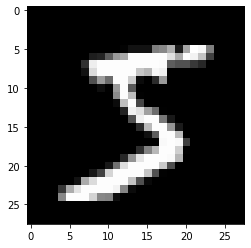

In [5]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [6]:
import torch
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))
n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [7]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [8]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)
def model(xb):
    return log_softmax(xb @ weights + bias)

In [9]:
bs = 64
xb = x_train[0:bs]
preds = model(xb)
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.3492, -3.0032, -2.3480, -2.0713, -2.6312, -2.1903, -2.2194, -2.0147,
        -2.1753, -2.3661], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [10]:
def nll(input, target):
    return - input[range(target.shape[0]), target].mean()
loss_func = nll

In [13]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3086, grad_fn=<NegBackward>)


In [14]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim = 1)
    return (preds == yb).float().mean()

In [15]:
print(accuracy(preds, yb))

tensor(0.1562)


In [16]:
from IPython.core.debugger import set_trace

lr = 0.5
epochs = 2

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)
        loss.backward()
        with torch.no_grad():
            weights -= weights.grad*lr
            bias -= bias.grad*lr
            weights.grad.zero_()
            bias.grad.zero_()

In [17]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0825, grad_fn=<NegBackward>) tensor(1.)


In [18]:
import torch.nn.functional as F
loss_func = F.cross_entropy

def model(xb):
    return xb @ weights + bias

In [19]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0825, grad_fn=<NllLossBackward>) tensor(1.)


In [20]:
from torch import nn

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))
    def forward(self, xb):
        return xb @ self.weights + self.bias

In [21]:
model = Mnist_Logistic()

In [22]:
print(loss_func(model(xb), yb))

tensor(2.4617, grad_fn=<NllLossBackward>)


In [24]:
with torch.no_grad():
    weights -= weights.grad * lr
    bias -= bias.grad * lr
    weights.grad.zero_()
    bias.grad.zero_()

In [26]:
def fit():
    for epoch in range(epochs):
        for i in range((n - 1) // bs + 1):
            start_i = i * bs
            end_i = start_i + bs
            xb = x_train[start_i: end_i]
            yb = y_train[start_i: end_i]
            pred = model(xb)
            loss = loss_func(pred, yb)
            loss.backward()
            with torch.no_grad():
                for p in model.parameters():
                    p -= p.grad * lr
                model.zero_grad()
fit()

In [27]:
print(loss_func(model(xb), yb))

tensor(0.0842, grad_fn=<NllLossBackward>)


In [28]:
class Mnist_Logitic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)
    def forward(self, xb):
        return self.lin(xb)

In [29]:
model = Mnist_Logistic()
print(loss_func(model(xb), yb))

tensor(2.3661, grad_fn=<NllLossBackward>)


In [30]:
fit()
print(loss_func(model(xb), yb))

tensor(0.0813, grad_fn=<NllLossBackward>)


In [32]:
with torch.no_grad():
    for p in model.parameters():
        p -= p.grad * lr
    model.zero_grad()

In [33]:
from torch import optim

In [44]:
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr=lr)


model, opt= get_model()
print(loss_func(model(xb), yb))

tensor(2.2178, grad_fn=<NllLossBackward>)


In [45]:
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)
        
        
        opt.zero_grad()
        loss.backward()
        opt.step()
print(loss_func(model(xb), yb))

tensor(0.0808, grad_fn=<NllLossBackward>)


In [46]:
from torch.utils.data import TensorDataset

In [47]:
train_ds = TensorDataset(x_train, y_train)

In [48]:
xb = y_train[start_i:end_i]
yb = y_train[start_i:end_i]

In [49]:
xb, yb = train_ds[i * bs:i * bs + bs]

In [53]:
model, opt = get_model()
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        xb, yb = train_ds[i * bs:i * bs + bs]
        pred = model(xb)
        loss = loss_func(pred, yb)
        
        loss.backward()
        opt.step()
        opt.zero_grad()
print(loss_func(model(xb), yb))

tensor(0.0794, grad_fn=<NllLossBackward>)


In [54]:
from torch.utils.data import DataLoader
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs)

In [55]:
for i in range((n - 1) // bs + 1):
    xb, yb = train_ds[i * bs : i * bs + bs]
    pred = model(xb)

In [56]:
for xb, yb in train_dl:
    pred = model(xb)

In [57]:
model, opt = get_model()
for epoch in range(epochs):
    for xb, yb in train_dl:
        pred = model(xb)
        loss = loss_func(pred, yb)
        
        loss.backward()
        opt.step()
        opt.zero_grad()
print(loss_func(model(xb), yb))

tensor(0.0800, grad_fn=<NllLossBackward>)


In [58]:
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [59]:
model, opt = get_model()
for epoch in range(epochs):
    model.train()
    for xb, yb in train_dl:
        pred = model(xb)
        loss = loss_func(pred, yb)
        
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    model.eval()
    with torch.no_grad():
        valid_loss = sum(loss_func(model(xb), yb) for xb, yb in valid_dl)
    print(epoch, valid_loss / len(valid_dl))

0 tensor(0.2976)
1 tensor(0.2958)


In [61]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    return loss.item(), len(xb)

In [62]:
import numpy as np

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)
        model.eval()
        with torch.no_grad():
            losses, nums = zip(*[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl])
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        print(epoch, val_loss)

In [63]:
def get_data(train_ds, valid_ds, bs):
    return (DataLoader(train_ds, batch_size = bs, shuffle=True), DataLoader(valid_ds, batch_size=bs * 2))

In [64]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.2948663571238518
1 0.34677217235565183


In [67]:
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)
    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))
lr= 0.1

In [68]:
model = Mnist_CNN()
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.369243168258667
1 0.3015665362596512


In [71]:
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func
    def forward(self, x):
        return self.func(x)
def preprocess(x):
    return x.view(-1, 1, 28, 28)
model = nn.Sequential(Lambda(preprocess), 
                     nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
                     nn.ReLU(),
                     nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
                     nn.ReLU(),
                     nn.AvgPool2d(4),
                     Lambda(lambda x: x.view(x.size(0), -1)))
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 1.6968958013534545
1 1.4564438892364502


In [73]:
def preprocess(x, y):
    return x.view(-1, 1, 28, 28), y

class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func
    def __len__(self):
        return len(self.dl)
    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [74]:
model = nn.Sequential(nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
                     nn.ReLU(), 
                     nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1), 
                     nn.ReLU(),
                     nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
                     nn.ReLU(),
                     nn.AdaptiveAvgPool2d(1),
                     Lambda(lambda x: x.view(x.size(0), -1)))
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.38353656249046325
1 0.3371776985526085


# Tensorboard

In [77]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [78]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])
trainset = torchvision.datasets.FashionMNIST("./data", download=True, train=True, transform=transform)
testset = torchvision.datasets.FashionMNIST('./data', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

classes = ("T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", 
           "Ankle Boot")

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

C:\Users\jatin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [79]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 8)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [80]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [81]:
from torch.utils.tensorboard import SummaryWriter

In [82]:
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

# Transfer leanring for computer vision Tutorial

In [119]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
cudnn.benchmask = True
plt.ion()

In [122]:
data_transforms = {
    "train":transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), 
    "val":transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}
data_dir = "D:\datasets_CSV\hymenoptera_data"
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ["train", "val"]}
dataloaders = {x:torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) 
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

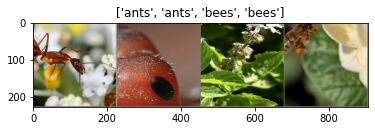

In [124]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
inputs, classes = next(iter(dataloaders["train"]))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [135]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        print(f"Epoch {epoch}/{num_epochs - 1}")
        print("-"*10)
        for phase in ["train", 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase=='train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == "train":
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() + inputs.size(0)
                running_corrects += torch.sum(preds==labels.data)
            if phase == 'train':
                scheduler.step()
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        print()
    time_elapsed = time.time() - since
    print(f"Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
    print(f"Best val acc: {best_acc:4f}")
    model.load_state_dict(best_model_wts)
    return model

In [140]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [137]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)
model.ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [138]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 1.1343 Acc: 0.7213
val Loss: 1.0557 Acc: 0.9150

Epoch 1/24
----------
train Loss: 1.1337 Acc: 0.7951
val Loss: 1.0676 Acc: 0.9085

Epoch 2/24
----------
train Loss: 1.1572 Acc: 0.7705
val Loss: 1.1033 Acc: 0.8562

Epoch 3/24
----------
train Loss: 1.1084 Acc: 0.8197
val Loss: 1.0465 Acc: 0.9346

Epoch 4/24
----------
train Loss: 1.1525 Acc: 0.7582
val Loss: 1.0877 Acc: 0.8954

Epoch 5/24
----------
train Loss: 1.1179 Acc: 0.8115
val Loss: 1.0819 Acc: 0.8758

Epoch 6/24
----------
train Loss: 1.1090 Acc: 0.8197
val Loss: 1.0861 Acc: 0.8889

Epoch 7/24
----------
train Loss: 1.0799 Acc: 0.8607
val Loss: 1.0684 Acc: 0.8954

Epoch 8/24
----------
train Loss: 1.0859 Acc: 0.8607
val Loss: 1.0534 Acc: 0.9346

Epoch 9/24
----------
train Loss: 1.0743 Acc: 0.8730
val Loss: 1.0569 Acc: 0.9150

Epoch 10/24
----------
train Loss: 1.0753 Acc: 0.8852
val Loss: 1.0516 Acc: 0.9216

Epoch 11/24
----------
train Loss: 1.0717 Acc: 0.8566
val Loss: 1.0495 Acc: 0.9412

Ep

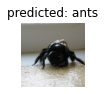

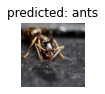

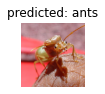

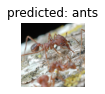

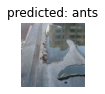

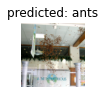

In [141]:
visualize_model(model_ft)

# Optimizing Vision Transformer Model for Deployment

In [143]:
from PIL import Image
import torch
import timm
import requests
import torchvision.transforms as transforms
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

In [144]:
print(torch.__version__)

1.9.1+cpu


In [148]:
model = torch.hub.load('facebookresearch/deit:main', 'deit_base_patch16_224', pretrained=True)
model.eval()

transform = transforms.Compose([
    transforms.Resize(256, interpolation=3),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD)
])
img = Image.open(requests.get("https://raw.githubusercontent.com/pytorch/ios-demo-app/master/HelloWorld/HelloWorld/HelloWorld/image.png", stream=True).raw)
img = transform(img)[None,]
out = model(img)
clsidx = torch.argmax(out)
print(clsidx.item())

Using cache found in C:\Users\jatin/.cache\torch\hub\facebookresearch_deit_main


269


In [150]:
model = torch.hub.load('facebookresearch/deit:main', 'deit_base_patch16_224', pretrained=True)
model.eval()
scripted_model = torch.jit.script(model)
scripted_model.save("fbdeit_scripted.pt")

Using cache found in C:\Users\jatin/.cache\torch\hub\facebookresearch_deit_main


In [152]:
backend = "fbgemm"
model.qconfig = torch.quantization.get_default_qconfig(backend)
torch.backends.quantized.engine = backend

quantized_model = torch.quantization.quantize_dynamic(model, qconfig_spec={torch.nn.Linear}, dtype=torch.qint8)
scripted_quantized_model = torch.jit.script(quantized_model)
scripted_quantized_model.save("fbdeit_scripted_quantized.pt")

# Adversarial Example Generation

In [153]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# NOTE: This is a hack to get around "User-agent" limitations when downloading MNIST datasets
#       see, https://github.com/pytorch/vision/issues/3497 for more information
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [154]:
epsilons = [0, .05, .1, .15, .2, .25, .3]
pretrained_model = "D:/datasets_CSV/lenet_mnist_model.pth"
use_cuda = True

In [156]:
# LeNet Model definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# MNIST Test dataset and dataloader declaration
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ])),
        batch_size=1, shuffle=True)

# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

# Initialize the network
model = Net().to(device)

# Load the pretrained model
model.load_state_dict(torch.load(pretrained_model, map_location='cpu'))

# Set the model in evaluation mode. In this case this is for the Dropout layers
model.eval()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw

CUDA Available:  False


Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [157]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

In [158]:
def test( model, device, test_loader, epsilon ):

    # Accuracy counter
    correct = 0
    adv_examples = []

    # Loop over all examples in test set
    for data, target in test_loader:

        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability

        # If the initial prediction is wrong, dont bother attacking, just move on
        if init_pred.item() != target.item():
            continue

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        # Re-classify the perturbed image
        output = model(perturbed_data)

        # Check for success
        final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        if final_pred.item() == target.item():
            correct += 1
            # Special case for saving 0 epsilon examples
            if (epsilon == 0) and (len(adv_examples) < 5):
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
        else:
            # Save some adv examples for visualization later
            if len(adv_examples) < 5:
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(test_loader))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct, len(test_loader), final_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

In [159]:
accuracies = []
examples = []
for eps in epsilons:
    acc, ex = test(model, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)

Epsilon: 0	Test Accuracy = 9810 / 10000 = 0.981
Epsilon: 0.05	Test Accuracy = 9426 / 10000 = 0.9426
Epsilon: 0.1	Test Accuracy = 8510 / 10000 = 0.851
Epsilon: 0.15	Test Accuracy = 6826 / 10000 = 0.6826
Epsilon: 0.2	Test Accuracy = 4301 / 10000 = 0.4301
Epsilon: 0.25	Test Accuracy = 2082 / 10000 = 0.2082
Epsilon: 0.3	Test Accuracy = 869 / 10000 = 0.0869


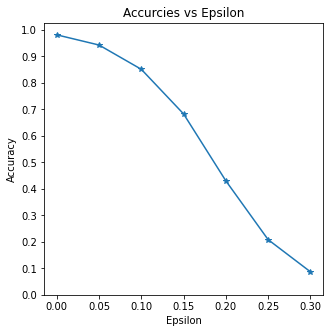

In [161]:
plt.figure(figsize=(5, 5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accurcies vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

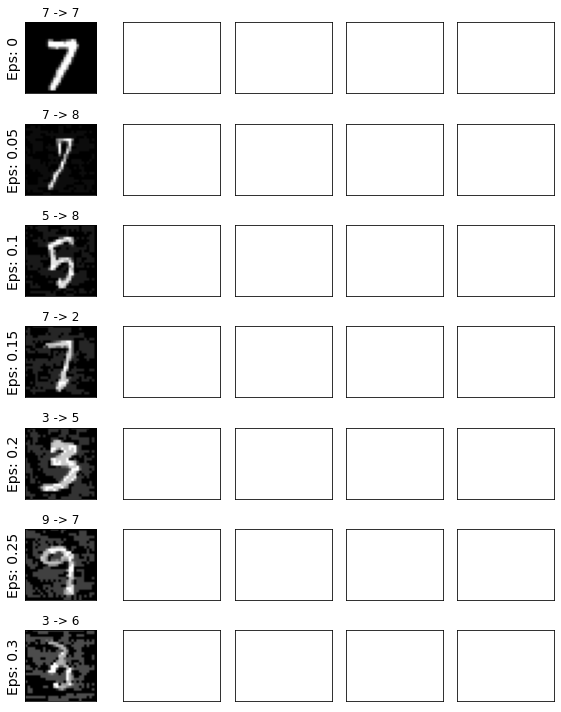

In [163]:
cnt = 0
plt.figure(figsize=(8, 10))
for i in range(len(epsilons)):
    for j in range(len(examples[i])):
        cnt += 1
        plt.subplot(len(epsilons), len(examples[0]), cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel("Eps: {}".format(epsilons[i]), fontsize=14)
            orig, adv, ex = examples[i][j]
            plt.title("{} -> {}".format(orig, adv))
            plt.imshow(ex, cmap="gray")
plt.tight_layout()
plt.show()

# Spatial Transformer networks tutorial

In [178]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

plt.ion()

In [179]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', "Mozilla/5.0")]
urllib.request.install_opener(opener)

In [182]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loader = torch.utils.data.DataLoader(datasets.MNIST(root=".", train=True, download=True,
                                           transform=transforms.Compose([
                                            transforms.ToTensor(),
                                            transforms.Normalize((0.1307, ), (0.3081, ))
])), batch_size=64, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root=".", train=False, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307, ), (0.3081,))
])), batch_size=64, shuffle=True, num_workers=4)

In [191]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

        # Spatial transformer localization-network
        self.localization = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=7),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True),
            nn.Conv2d(8, 10, kernel_size=5),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True)
        )

        # Regressor for the 3 * 2 affine matrix
        self.fc_loc = nn.Sequential(
            nn.Linear(10 * 3 * 3, 32),
            nn.ReLU(True),
            nn.Linear(32, 3 * 2)
        )

        # Initialize the weights/bias with identity transformation
        self.fc_loc[2].weight.data.zero_()
        self.fc_loc[2].bias.data.copy_(torch.tensor([1, 0, 0, 0, 1, 0], dtype=torch.float))

    # Spatial transformer network forward function
    def stn(self, x):
        xs = self.localization(x)
        xs = xs.view(-1, 10 * 3 * 3)
        theta = self.fc_loc(xs)
        theta = theta.view(-1, 2, 3)

        grid = F.affine_grid(theta, x.size())
        x = F.grid_sample(x, grid)

        return x

    def forward(self, x):
        # transform the input
        x = self.stn(x)

        # Perform the usual forward pass
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


model = Net().to(device)

In [192]:
optimizer = optim.SGD(model.parameters(), lr=0.01)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 500 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
#
# A simple test procedure to measure the STN performances on MNIST.
#


def test():
    with torch.no_grad():
        model.eval()
        test_loss = 0
        correct = 0
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            # sum up batch loss
            test_loss += F.nll_loss(output, target, size_average=False).item()
            # get the index of the max log-probability
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(test_loader.dataset)
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'
              .format(test_loss, correct, len(test_loader.dataset),
                      100. * correct / len(test_loader.dataset)))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.354671
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.655421

Test set: Average loss: 0.2896, Accuracy: 9169/10000 (92%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.575855
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.320240

Test set: Average loss: 0.1452, Accuracy: 9579/10000 (96%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.509421
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.308648

Test set: Average loss: 0.1068, Accuracy: 9653/10000 (97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.418828
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.334287

Test set: Average loss: 0.1021, Accuracy: 9706/10000 (97%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.280425
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.245549

Test set: Average loss: 0.0637, Accuracy: 9808/10000 (98%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.231350
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.183522

Test set: Average loss: 0.0607, Accuracy: 9813/10000 (98%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.349194
Train Epoch: 7 [320

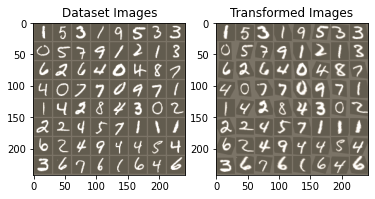

In [193]:
def convert_image_np(inp):
    """Convert a Tensor to numpy image."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    return inp

# We want to visualize the output of the spatial transformers layer
# after the training, we visualize a batch of input images and
# the corresponding transformed batch using STN.


def visualize_stn():
    with torch.no_grad():
        # Get a batch of training data
        data = next(iter(test_loader))[0].to(device)

        input_tensor = data.cpu()
        transformed_input_tensor = model.stn(data).cpu()

        in_grid = convert_image_np(
            torchvision.utils.make_grid(input_tensor))

        out_grid = convert_image_np(
            torchvision.utils.make_grid(transformed_input_tensor))

        # Plot the results side-by-side
        f, axarr = plt.subplots(1, 2)
        axarr[0].imshow(in_grid)
        axarr[0].set_title('Dataset Images')

        axarr[1].imshow(out_grid)
        axarr[1].set_title('Transformed Images')

for epoch in range(1, 20 + 1):
    train(epoch)
    test()

# Visualize the STN transformation on some input batch
visualize_stn()

plt.ioff()
plt.show()

# Audio io

In [14]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

1.9.1+cpu
0.9.1


In [16]:
import math
import time 
import librosa
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Audio, display

In [17]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

DEFAULT_OFFSET = 201

In [18]:
def _get_log_freq(sample_rate, max_sweep_rate, offset):
    start, stop = math.log(offset), math.log(offset + max_sweep_rate // 2)
    return torch.exp(torch.linspace(start, stop, sample_rate, dtype=torch.double)) - offset

def _get_inverse_log_freq(freq, sample_rate, offset):
    half = sample_rate // 2
    return sample_rate * (math.log(1 + freq / offset) / math.log(1 + half / offset))

In [19]:
def _get_freq_ticks(sample_rate, offset, f_max):
    time, freq = [], []
    for exp in range(2, 5):
        for v in range(1, 10):
            f = v * 10 ** exp
            if f < sample_rate // 2:
                t = _get_inverse_log_freq(f, sample_rate, offset) / sample_rate
                time.append(t)
                freq.append(f)
    t_max = _get_inverse_log_freq(f_max, sample_rate, offset) / sample_rate
    time.append(t_max)
    freq.append(f_max)
    return time, freq

In [20]:
def get_sine_sweep(sample_rate, offset=DEFAULT_OFFSET):
    max_sweep_rate = sample_rate
    freq = _get_log_freq(sample_rate, max_sweep_rate, offset)
    delta = 2 * math.pi * freq / sample_rate
    cummulative = torch.cumsum(delta, dim=0)
    signal = torch.sin(cummulative).unsqueeze(dim=0)
    return signal

In [21]:
def plot_sweep(waveform, sample_rate, title, max_sweep_rate=48000, offset=DEFAULT_OFFSET):
    x_ticks = [100, 500, 1000, 5000, 10000, 20000, max_sweep_rate // 2]
    y_ticks = [1000, 5000, 10000, 20000, sample_rate // 2]
    time, freq = _get_freq_ticks(max_sweep_rate, offset, sample_rate // 2)
    freq_x = [f if f in x_ticks and f <= max_sweep_rate // 2 else None for f in freq]
    freq_y = [f for f in freq if f in y_ticks and 1000 <= f <= sample_rate // 2]
    
    figure, axis = plt.subplots(1, 1)
    _, _, _, cax = axis.specgram(waveform[0].numpy(), Fs=sample_rate)
    plt.xticks(time, freq_x)
    plt.yticks(freq_y, freq_y)
    axis.set_xlabel("Original Signal Frequency (Hz, log scale)")
    axis.set_ylabel("Waveform Frequency (Hz)")
    axis.xaxis.grid(True, alpha=0.67)
    axis.yaxis.grid(True, alpha=0.67)
    figure.suptitle(f"{title} (sample rate: {sample_rate} Hz)")
    plt.colorbar(cax)
    plt.show(block=True)

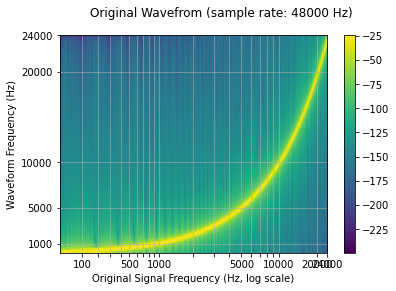

In [22]:
sample_rate = 48000
waveform = get_sine_sweep(sample_rate)

plot_sweep(waveform, sample_rate, title="Original Wavefrom")
Audio(waveform.numpy()[0], rate=sample_rate)

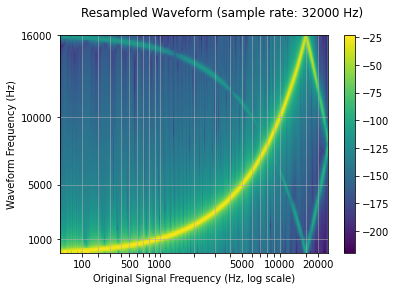

In [23]:
resample_rate = 32000
resampler = T.Resample(sample_rate, resample_rate, dtype=waveform.dtype)
resampled_waveform = resampler(waveform)

plot_sweep(resampled_waveform, resample_rate, title="Resampled Waveform")
Audio(resampled_waveform.numpy()[0], rate=resample_rate)

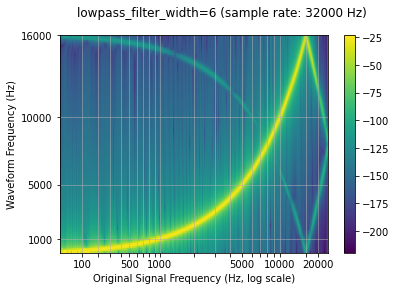

In [25]:
sample_rate = 48000
resample_rate = 32000

resamled_waveform = F.resample(waveform, sample_rate, resample_rate, lowpass_filter_width=6)
plot_sweep(resampled_waveform, resample_rate, title="lowpass_filter_width=6")

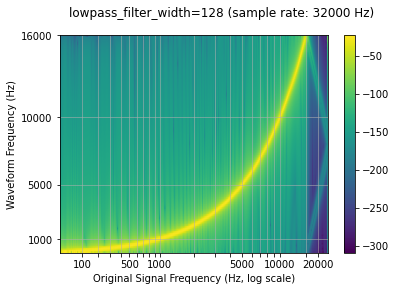

In [26]:
resampled_waveform = F.resample(waveform, sample_rate, resample_rate, lowpass_filter_width=128)
plot_sweep(resampled_waveform, resample_rate, title="lowpass_filter_width=128")

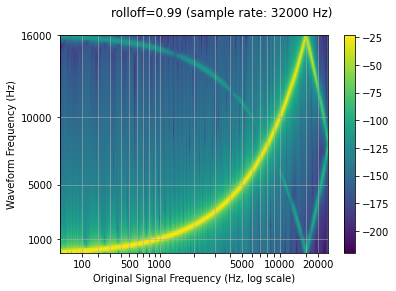

In [27]:
sample_rate = 48000
resample_rate = 32000

resampled_waveform = F.resample(waveform, sample_rate, resample_rate, rolloff=0.99)
plot_sweep(resampled_waveform, resample_rate, title="rolloff=0.99")

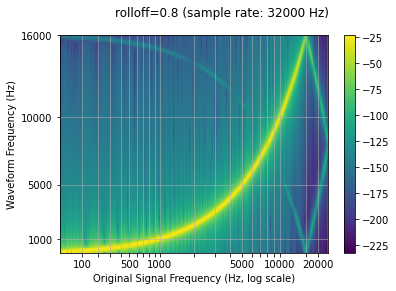

In [29]:
resampled_waveform = F.resample(waveform, sample_rate, resample_rate, rolloff=0.8)
plot_sweep(resampled_waveform, resample_rate, title="rolloff=0.8")

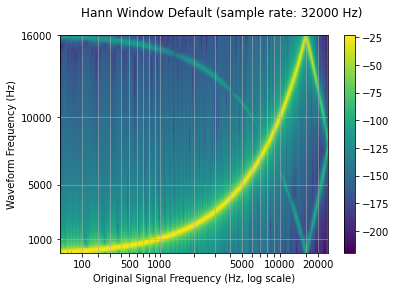

In [30]:
sample_rate = 48000
resample_rate = 32000

resampled_waveform = F.resample(waveform, sample_rate, resample_rate, resampling_method="sinc_interpolation")
plot_sweep(resampled_waveform, resample_rate, title="Hann Window Default")

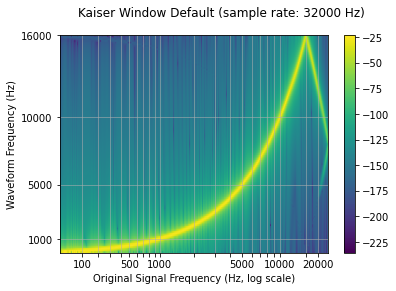

In [32]:
resampled_waveform = F.resample(waveform, sample_rate, resample_rate, resampling_method="kaiser_window")
plot_sweep(resampled_waveform, resample_rate, title="Kaiser Window Default")

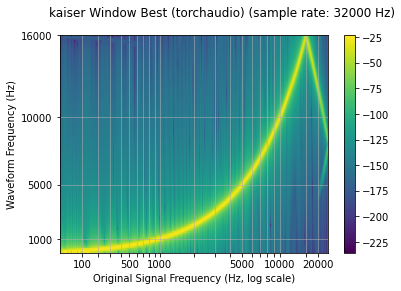

In [35]:
sample_rate = 48000
resample_rate = 32000

resampled_wavefrom = F.resample(waveform, sample_rate, resample_rate, lowpass_filter_width=64, 
                                rolloff=0.9475937167399596, resampling_method="kaiser_window", 
                                beta=14.769656459379492)
plot_sweep(resampled_waveform, resample_rate, title="kaiser Window Best (torchaudio)")
Audio(resampled_waveform.numpy()[0], rate=resample_rate)

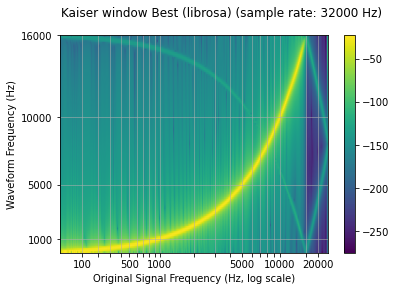

In [36]:
librosa_resampled_waveform = torch.from_numpy(librosa.resample(waveform.squeeze().numpy(), orig_sr=sample_rate, 
                                                              target_sr=resample_rate, 
                                                               res_type="kaiser_best")).unsqueeze(0)
plot_sweep(librosa_resampled_waveform, resample_rate, title="Kaiser window Best (librosa)")

In [37]:
mse = torch.square(resampled_waveform-librosa_resampled_waveform).mean().item()
print("torchaudio and librosa kaiser best MSE:", mse)

torchaudio and librosa kaiser best MSE: 0.005007899718306897


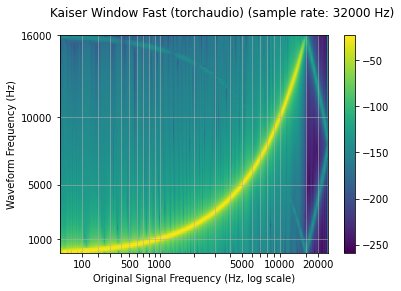

In [38]:
resampled_waveform = F.resample(waveform, sample_rate, resample_rate, lowpass_filter_width=16, rolloff=0.85, 
                               resampling_method="kaiser_window", beta = 8.555504641634386)
plot_sweep(resampled_waveform, resample_rate, title="Kaiser Window Fast (torchaudio)")

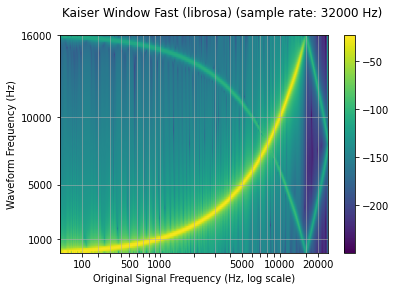

In [39]:
librosa_resampled_waveform = torch.from_numpy(librosa.resample(waveform.squeeze().numpy(), orig_sr=sample_rate,
                                                              target_sr=resample_rate, res_type="kaiser_fast"
                                                              )).unsqueeze(0)
plot_sweep(librosa_resampled_waveform, resample_rate, title="Kaiser Window Fast (librosa)")

In [41]:
mse = torch.square(resampled_waveform - librosa_resampled_waveform).mean().item()
print("torchaudio and librosa kaiser fast MSE:", mse)

torchaudio and librosa kaiser fast MSE: 0.0002567981886101614


In [42]:
def benchmark_resample(
    method,
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=6,
    rolloff=0.99,
    resampling_method="sinc_interpolation",
    beta=None,
    librosa_type=None,
    iters=5,
):
    if method == "functional":
        begin = time.monotonic()
        for _ in range(iters):
            F.resample(
                waveform,
                sample_rate,
                resample_rate,
                lowpass_filter_width=lowpass_filter_width,
                rolloff=rolloff,
                resampling_method=resampling_method,
            )
        elapsed = time.monotonic() - begin
        return elapsed / iters
    elif method == "transforms":
        resampler = T.Resample(
            sample_rate,
            resample_rate,
            lowpass_filter_width=lowpass_filter_width,
            rolloff=rolloff,
            resampling_method=resampling_method,
            dtype=waveform.dtype,
        )
        begin = time.monotonic()
        for _ in range(iters):
            resampler(waveform)
        elapsed = time.monotonic() - begin
        return elapsed / iters
    elif method == "librosa":
        waveform_np = waveform.squeeze().numpy()
        begin = time.monotonic()
        for _ in range(iters):
            librosa.resample(waveform_np, orig_sr=sample_rate, target_sr=resample_rate, res_type=librosa_type)
        elapsed = time.monotonic() - begin
        return elapsed / iters

In [43]:
configs = {
    "downsample (48 -> 44.1 kHz)": [48000, 44100],
    "downsample (16 -> 8 kHz)": [16000, 8000],
    "upsample (44.1 -> 48 kHz)": [44100, 48000],
    "upsample (8 -> 16 kHz)": [8000, 16000],
}

for label in configs:
    times, rows = [], []
    sample_rate = configs[label][0]
    resample_rate = configs[label][1]
    waveform = get_sine_sweep(sample_rate)

    # sinc 64 zero-crossings
    f_time = benchmark_resample("functional", waveform, sample_rate, resample_rate, lowpass_filter_width=64)
    t_time = benchmark_resample("transforms", waveform, sample_rate, resample_rate, lowpass_filter_width=64)
    times.append([None, 1000 * f_time, 1000 * t_time])
    rows.append("sinc (width 64)")

    # sinc 6 zero-crossings
    f_time = benchmark_resample("functional", waveform, sample_rate, resample_rate, lowpass_filter_width=16)
    t_time = benchmark_resample("transforms", waveform, sample_rate, resample_rate, lowpass_filter_width=16)
    times.append([None, 1000 * f_time, 1000 * t_time])
    rows.append("sinc (width 16)")

    # kaiser best
    lib_time = benchmark_resample("librosa", waveform, sample_rate, resample_rate, librosa_type="kaiser_best")
    f_time = benchmark_resample(
        "functional",
        waveform,
        sample_rate,
        resample_rate,
        lowpass_filter_width=64,
        rolloff=0.9475937167399596,
        resampling_method="kaiser_window",
        beta=14.769656459379492,
    )
    t_time = benchmark_resample(
        "transforms",
        waveform,
        sample_rate,
        resample_rate,
        lowpass_filter_width=64,
        rolloff=0.9475937167399596,
        resampling_method="kaiser_window",
        beta=14.769656459379492,
    )
    times.append([1000 * lib_time, 1000 * f_time, 1000 * t_time])
    rows.append("kaiser_best")

    # kaiser fast
    lib_time = benchmark_resample("librosa", waveform, sample_rate, resample_rate, librosa_type="kaiser_fast")
    f_time = benchmark_resample(
        "functional",
        waveform,
        sample_rate,
        resample_rate,
        lowpass_filter_width=16,
        rolloff=0.85,
        resampling_method="kaiser_window",
        beta=8.555504641634386,
    )
    t_time = benchmark_resample(
        "transforms",
        waveform,
        sample_rate,
        resample_rate,
        lowpass_filter_width=16,
        rolloff=0.85,
        resampling_method="kaiser_window",
        beta=8.555504641634386,
    )
    times.append([1000 * lib_time, 1000 * f_time, 1000 * t_time])
    rows.append("kaiser_fast")

    df = pd.DataFrame(times, columns=["librosa", "functional", "transforms"], index=rows)
    df.columns = pd.MultiIndex.from_product([[f"{label} time (ms)"], df.columns])

    print(f"torchaudio: {torchaudio.__version__}")
    print(f"librosa: {librosa.__version__}")
    display(df.round(2))

torchaudio: 0.9.1
librosa: 0.9.2


downsample (48 -> 44.1 kHz) time (ms)                      
                                              librosa functional transforms
sinc (width 64)                                   NaN       43.8        0.0
sinc (width 16)                                   NaN       34.4        3.2
kaiser_best                                      37.6       50.0        3.2
kaiser_fast                                       6.2       50.0        0.0

torchaudio: 0.9.1
librosa: 0.9.2


downsample (16 -> 8 kHz) time (ms)                      
                                           librosa functional transforms
sinc (width 64)                                NaN       15.6       15.6
sinc (width 16)                                NaN        6.2        6.2
kaiser_best                                   18.8       15.6       12.4
kaiser_fast                                    3.2        3.2        6.2

torchaudio: 0.9.1
librosa: 0.9.2


upsample (44.1 -> 48 kHz) time (ms)                      
                                            librosa functional transforms
sinc (width 64)                                 NaN       40.6        0.0
sinc (width 16)                                 NaN       34.2        3.2
kaiser_best                                    43.8       84.4        3.0
kaiser_fast                                     9.4       75.0        0.0

torchaudio: 0.9.1
librosa: 0.9.2


upsample (8 -> 16 kHz) time (ms)                      
                                         librosa functional transforms
sinc (width 64)                              NaN        6.4        6.2
sinc (width 16)                              NaN        3.0        3.2
kaiser_best                                 18.8        6.2        6.2
kaiser_fast                                  3.2        3.2        3.0

# Feature extractor

In [1]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

1.12.0+cpu
0.12.0+cpu


In [2]:
from IPython.display import Audio
import librosa
import matplotlib.pyplot as plt
from torchaudio.utils import download_asset

torch.random.manual_seed(0)

SAMPLE_SPEECH = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")


def plot_waveform(waveform, sr, title="Waveform"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    figure.suptitle(title)
    plt.show(block=False)


def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


def plot_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")
    plt.show(block=False)

  0%|          | 0.00/106k [00:00<?, ?B/s]

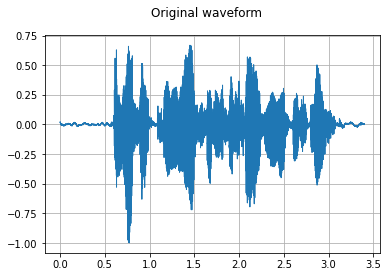

In [3]:
SPEECH_WAVEFORM, SAMPLE_RATE = torchaudio.load(SAMPLE_SPEECH)

plot_waveform(SPEECH_WAVEFORM, SAMPLE_RATE, title="Original waveform")
Audio(SPEECH_WAVEFORM.numpy(), rate=SAMPLE_RATE)

In [4]:
n_fft = 1024
win_length = None
hop_length = 512

# Define transform
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)

In [5]:
# Perform transform
spec = spectrogram(SPEECH_WAVEFORM)

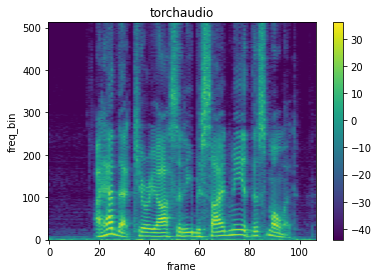

In [6]:
plot_spectrogram(spec[0], title="torchaudio")

In [7]:
torch.random.manual_seed(0)

n_fft = 1024
win_length = None
hop_length = 512

spec = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
)(SPEECH_WAVEFORM)

In [8]:
griffin_lim = T.GriffinLim(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
)

In [9]:
reconstructed_waveform = griffin_lim(spec)

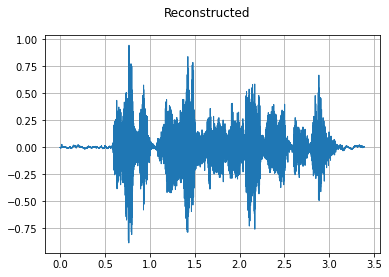

In [10]:
plot_waveform(reconstructed_waveform, SAMPLE_RATE, title="Reconstructed")
Audio(reconstructed_waveform, rate=SAMPLE_RATE)

In [11]:
n_fft = 256
n_mels = 64
sample_rate = 6000

mel_filters = F.melscale_fbanks(
    int(n_fft // 2 + 1),
    n_mels=n_mels,
    f_min=0.0,
    f_max=sample_rate / 2.0,
    sample_rate=sample_rate,
    norm="slaney",
)

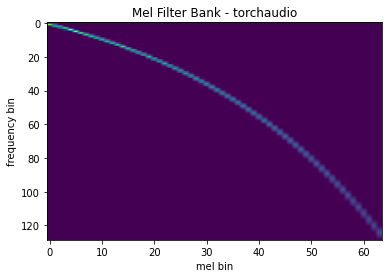

In [12]:
plot_fbank(mel_filters, "Mel Filter Bank - torchaudio")

In [13]:
mel_filters_librosa = librosa.filters.mel(
    sr=sample_rate,
    n_fft=n_fft,
    n_mels=n_mels,
    fmin=0.0,
    fmax=sample_rate / 2.0,
    norm="slaney",
    htk=True,
).T

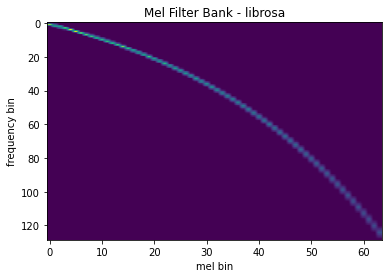

Mean Square Difference:  5.326851900683876e-17


In [14]:
plot_fbank(mel_filters_librosa, "Mel Filter Bank - librosa")

mse = torch.square(mel_filters - mel_filters_librosa).mean().item()
print("Mean Square Difference: ", mse)

In [15]:
n_fft = 1024
win_length = None
hop_length = 512
n_mels = 128

mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

melspec = mel_spectrogram(SPEECH_WAVEFORM)

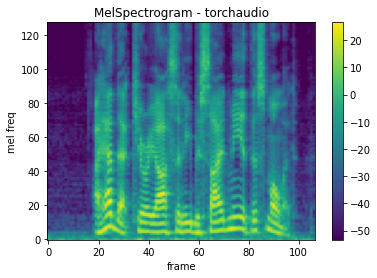

In [16]:
plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

In [17]:
melspec_librosa = librosa.feature.melspectrogram(
    y=SPEECH_WAVEFORM.numpy()[0],
    sr=sample_rate,
    n_fft=n_fft,
    hop_length=hop_length,
    win_length=win_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    n_mels=n_mels,
    norm="slaney",
    htk=True,
)

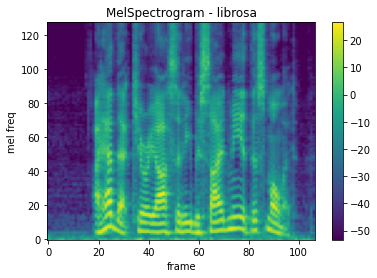

Mean Square Difference:  1.0426493002313464e-09


In [18]:
plot_spectrogram(melspec_librosa, title="MelSpectrogram - librosa", ylabel="mel freq")

mse = torch.square(melspec - melspec_librosa).mean().item()
print("Mean Square Difference: ", mse)

In [19]:
n_fft = 2048
win_length = None
hop_length = 512
n_mels = 256
n_mfcc = 256

mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,
    melkwargs={
        "n_fft": n_fft,
        "n_mels": n_mels,
        "hop_length": hop_length,
        "mel_scale": "htk",
    },
)

mfcc = mfcc_transform(SPEECH_WAVEFORM)

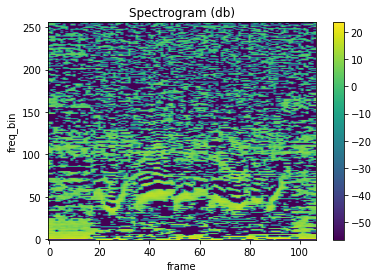

In [20]:
plot_spectrogram(mfcc[0])

In [21]:
melspec = librosa.feature.melspectrogram(
    y=SPEECH_WAVEFORM.numpy()[0],
    sr=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    n_mels=n_mels,
    htk=True,
    norm=None,
)

mfcc_librosa = librosa.feature.mfcc(
    S=librosa.core.spectrum.power_to_db(melspec),
    n_mfcc=n_mfcc,
    dct_type=2,
    norm="ortho",
)

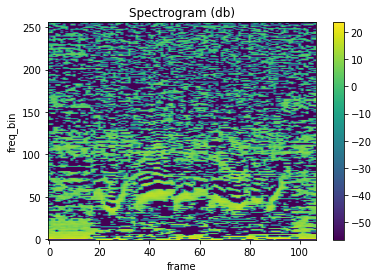

Mean Square Difference:  0.810394287109375


In [22]:
plot_spectrogram(mfcc_librosa)

mse = torch.square(mfcc - mfcc_librosa).mean().item()
print("Mean Square Difference: ", mse)

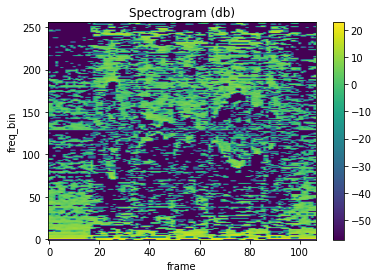

In [23]:
n_fft = 2048
win_length = None
hop_length = 512
n_lfcc = 256

lfcc_transform = T.LFCC(
    sample_rate=sample_rate,
    n_lfcc=n_lfcc,
    speckwargs={
        "n_fft": n_fft,
        "win_length": win_length,
        "hop_length": hop_length,
    },
)

lfcc = lfcc_transform(SPEECH_WAVEFORM)
plot_spectrogram(lfcc[0])

In [24]:
pitch = F.detect_pitch_frequency(SPEECH_WAVEFORM, SAMPLE_RATE)

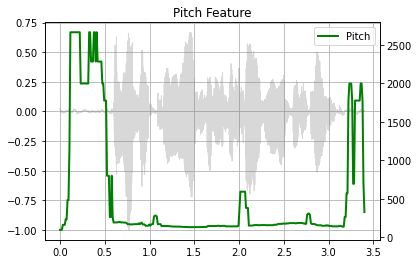

In [25]:
def plot_pitch(waveform, sr, pitch):
    figure, axis = plt.subplots(1, 1)
    axis.set_title("Pitch Feature")
    axis.grid(True)

    end_time = waveform.shape[1] / sr
    time_axis = torch.linspace(0, end_time, waveform.shape[1])
    axis.plot(time_axis, waveform[0], linewidth=1, color="gray", alpha=0.3)

    axis2 = axis.twinx()
    time_axis = torch.linspace(0, end_time, pitch.shape[1])
    axis2.plot(time_axis, pitch[0], linewidth=2, label="Pitch", color="green")

    axis2.legend(loc=0)
    plt.show(block=False)


plot_pitch(SPEECH_WAVEFORM, SAMPLE_RATE, pitch)